# **Association Analysis**

---


## Association Rules Generation from Frequent Itemsets

We will work with the following example, to find some association

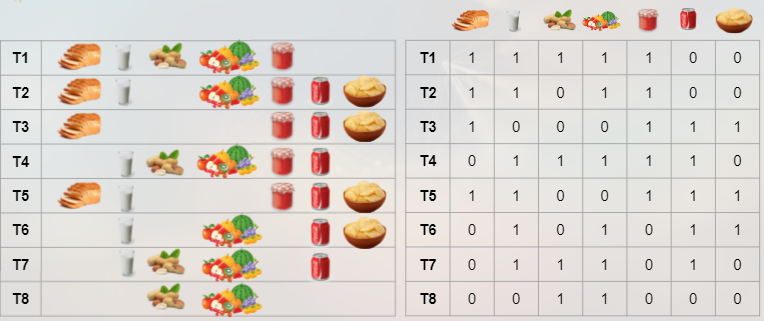

In [ ]:
import pandas as pd
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

dataset = [['Bread', 'Milk', 'Peanuts', 'Fruits', 'Jam'],
           ['Bread', 'Milk', 'Fruits', 'Jam', 'Soda', 'Chips'],
           ['Bread', 'Jam', 'Soda', 'Chips'],
           [ 'Milk', 'Peanuts', 'Fruits', 'Jam', 'Soda'],
           ['Bread', 'Milk', 'Jam','Fruits', 'Soda', 'Chips'],
           ['Milk', 'Fruits', 'Soda', 'Chips'],
           ['Milk', 'Peanuts', 'Fruits', 'Soda'],
           ['Peanuts', 'Fruits']]

te = TransactionEncoder() #Encodes database transaction data in form of a Python list of lists into a NumPy array
te.fit(dataset)
te_array = te.transform(dataset)
#the fit method, the TransactionEncoder learns the unique labels in the dataset, and via the transform method, 
#it transforms the input dataset (a Python list of lists) into a one-hot encoded NumPy boolean array
df = pd.DataFrame(te_array, columns=te.columns_) #turn the array into a data frame 
df.head()

Bread  Chips  Fruits   Jam   Milk  Peanuts   Soda
0   True  False    True  True   True     True  False
1   True   True    True  True   True    False   True
2   True   True   False  True  False    False   True
3  False  False    True  True   True     True   True
4   True   True    True  True   True    False   True

In [ ]:
frequent_itemsets = apriori(df, min_support=0.6, use_colnames=True) #applying the apriori algorithm and creating a pandas DataFrame of frequent itemsets as generated by the apriori function
frequent_itemsets

support              itemsets
0    0.875              (Fruits)
1    0.625                 (Jam)
2    0.750                (Milk)
3    0.750                (Soda)
4    0.750        (Fruits, Milk)
5    0.625        (Soda, Fruits)
6    0.625          (Soda, Milk)
7    0.625  (Soda, Fruits, Milk)

#Rule Generation and Selection Criteria

Pandas DataFrames make it easy to filter the results further. Let's say we are only interested in rules that satisfy the following criteria:

at least 2 antecedents , a confidence > 0.75 , a lift score > 1.2

In [ ]:
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.7)  #selecting the ones with confidence>0.7
rules

antecedents     consequents  ...  leverage  conviction
0         (Fruits)          (Milk)  ...  0.093750      1.7500
1           (Milk)        (Fruits)  ...  0.093750         inf
2           (Soda)        (Fruits)  ... -0.031250      0.7500
3         (Fruits)          (Soda)  ... -0.031250      0.8750
4           (Soda)          (Milk)  ...  0.062500      1.5000
5           (Milk)          (Soda)  ...  0.062500      1.5000
6   (Fruits, Soda)          (Milk)  ...  0.156250         inf
7     (Soda, Milk)        (Fruits)  ...  0.078125         inf
8   (Fruits, Milk)          (Soda)  ...  0.062500      1.5000
9           (Soda)  (Fruits, Milk)  ...  0.062500      1.5000
10        (Fruits)    (Soda, Milk)  ...  0.078125      1.3125
11          (Milk)  (Fruits, Soda)  ...  0.156250      2.2500

[12 rows x 9 columns]

In [ ]:
rules["antecedent_len"] = rules["antecedents"].apply(lambda x: len(x)) # defining the column antecedent_len to display the length of the antecedent
rules 

antecedents     consequents  ...  conviction  antecedent_len
0         (Fruits)          (Milk)  ...      1.7500               1
1           (Milk)        (Fruits)  ...         inf               1
2           (Soda)        (Fruits)  ...      0.7500               1
3         (Fruits)          (Soda)  ...      0.8750               1
4           (Soda)          (Milk)  ...      1.5000               1
5           (Milk)          (Soda)  ...      1.5000               1
6   (Fruits, Soda)          (Milk)  ...         inf               2
7     (Soda, Milk)        (Fruits)  ...         inf               2
8   (Fruits, Milk)          (Soda)  ...      1.5000               2
9           (Soda)  (Fruits, Milk)  ...      1.5000               1
10        (Fruits)    (Soda, Milk)  ...      1.3125               1
11          (Milk)  (Fruits, Soda)  ...      2.2500               1

[12 rows x 10 columns]

In [ ]:
rules[ (rules['antecedent_len'] >= 2) &
       (rules['confidence'] > 0.75) &
       (rules['lift'] > 1.2) ]  #selecting the rule that satisfies all conditions

antecedents consequents  ...  conviction  antecedent_len
6  (Fruits, Soda)      (Milk)  ...         inf               2

[1 rows x 10 columns]

##Market Basket Analysis

Now , we will try to experiment on another dataset.

First we will begin by importing the needed libraries:

In [ ]:
import numpy as np
import pandas as pd

Here you can find The dataset that we'll be using. It consists of columns that represent several items, and each transaction has bought the specified items. 

In [ ]:
# clone git repo
!git clone https://github.com/zaka-ai/machine_learning_certification
# change working directory
%cd machine_learning_certification/


df = pd.read_csv('store_data.csv', header= None)
df.head()

Cloning into 'machine_learning_certification'...
remote: Enumerating objects: 22, done.
remote: Counting objects: 100% (22/22), done.
remote: Compressing objects: 100% (20/20), done.
remote: Total 22 (delta 6), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (22/22), done.
/content/machine_learning_certification/machine_learning_certification


0          1           2   ...               17       18         19
0         shrimp    almonds     avocado  ...  frozen smoothie  spinach  olive oil
1        burgers  meatballs        eggs  ...              NaN      NaN        NaN
2        chutney        NaN         NaN  ...              NaN      NaN        NaN
3         turkey    avocado         NaN  ...              NaN      NaN        NaN
4  mineral water       milk  energy bar  ...              NaN      NaN        NaN

[5 rows x 20 columns]

Let's see the shape of the data that we have.

In [ ]:
df.shape

(7501, 20)

So we have in total 7501 transactions, and the maximum number of items bought during one transaction is 20.

Now we will transform this dataframe into a list to operate on it just like before.

In [ ]:
df=df.astype(str) #We convert it to string just that the operations of the encoder are carried out on the SAME data type.

In [ ]:
basket_sets = df.values.tolist()

In [ ]:
print(basket_sets)

[['shrimp', 'almonds', 'avocado', 'vegetables mix', 'green grapes', 'whole weat flour', 'yams', 'cottage cheese', 'energy drink', 'tomato juice', 'low fat yogurt', 'green tea', 'honey', 'salad', 'mineral water', 'salmon', 'antioxydant juice', 'frozen smoothie', 'spinach', 'olive oil'], ['burgers', 'meatballs', 'eggs', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan'], ['chutney', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan'], ['turkey', 'avocado', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan'], ['mineral water', 'milk', 'energy bar', 'whole wheat rice', 'green tea', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan'], ['low fat yogurt', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan

We can see that we obtained a list of lists, we can proceed with our analysis. Later we will remove the nan.

We will now encode it in a dataframe.

In [ ]:
te = TransactionEncoder() #Encodes database transaction data in form of a Python list of lists into a NumPy array
te_array = te.fit_transform(basket_sets)
#the fit method, the TransactionEncoder learns the unique labels in the dataset, and via the transform method, 
#it transforms the input dataset (a Python list of lists) into a one-hot encoded NumPy boolean array
baskets = pd.DataFrame(te_array, columns=te.columns_) #turn the array into a data frame 
baskets.head()

asparagus  almonds  antioxydant juice  ...   yams  yogurt cake  zucchini
0       False     True               True  ...   True        False     False
1       False    False              False  ...  False        False     False
2       False    False              False  ...  False        False     False
3       False    False              False  ...  False        False     False
4       False    False              False  ...  False        False     False

[5 rows x 121 columns]

In [ ]:
baskets=baskets.drop(columns='nan')

In [ ]:
baskets.head()

asparagus  almonds  antioxydant juice  ...   yams  yogurt cake  zucchini
0       False     True               True  ...   True        False     False
1       False    False              False  ...  False        False     False
2       False    False              False  ...  False        False     False
3       False    False              False  ...  False        False     False
4       False    False              False  ...  False        False     False

[5 rows x 120 columns]

#Finding the Frequent Itemsets:

Frequent Itemset:
An itemset whose support is greater or equal to a minimum support threshold.

Apriori Principle:
If an itemset is frequent, then all of its subsets must also be frequent.

The Apriori Algorithm takes care of finding these frequent itemsets.
We assume a minimum support of 0.004 below.

In [ ]:
frequent_itemsets = apriori(baskets, min_support=0.004, use_colnames=True)
frequent_itemsets

support                                           itemsets
0    0.020397                                          (almonds)
1    0.008932                                (antioxydant juice)
2    0.004666                                        (asparagus)
3    0.033329                                          (avocado)
4    0.004533                                      (babies food)
..        ...                                                ...
954  0.004933        (milk, spaghetti, mineral water, chocolate)
955  0.004399             (spaghetti, mineral water, eggs, milk)
956  0.004399  (frozen vegetables, spaghetti, mineral water, ...
957  0.004533  (frozen vegetables, spaghetti, mineral water, ...
958  0.004399      (spaghetti, mineral water, milk, ground beef)

[959 rows x 2 columns]

#Association Rule Generation:

In [ ]:
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)
rules.head()

antecedents  consequents  antecedent support  ...      lift  leverage  conviction
0    (burgers)    (almonds)            0.087188  ...  2.923577  0.003421    1.041724
1    (almonds)    (burgers)            0.020397  ...  2.923577  0.003421    1.225089
2  (chocolate)    (almonds)            0.163845  ...  1.795099  0.002657    1.016834
3    (almonds)  (chocolate)            0.020397  ...  1.795099  0.002657    1.184553
4       (eggs)    (almonds)            0.179709  ...  1.782108  0.002867    1.016555

[5 rows x 9 columns]

Obtaining the rules with minimum lift 2 and minimum confidence of 0.6:

**Note:**

Confidence: Measure of how often items in Y appear in transactions that contain X

Lift: The confidence of a rule divided by the expected confidence if independent.

In a rule where X implies Y, X is the antecedent and Y is the consequent

In [ ]:
rules[ (rules['lift'] >= 2) &
       (rules['confidence'] >= 0.6) ]

antecedents      consequents  ...  leverage  conviction
2111  (frozen vegetables, soup)  (mineral water)  ...  0.003159    2.077178
2490           (soup, pancakes)  (mineral water)  ...  0.002645    2.044380
2557      (olive oil, tomatoes)      (spaghetti)  ...  0.003146    2.123717

[3 rows x 9 columns]